¡Hola,Aldo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Aldo! Has hecho un excelente trabajo, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

 ### **Descipción del proyecto**

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es Diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

#### **Instrucciones para completar el proyecto**

#### **Paso 1.- Abre el archivo de datos y estudia la información general.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from scipy.stats import levene, ttest_ind

df_games = pd.read_csv("games.csv")

print(df_games.head())
df_games.info()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

#### **Paso 2. Prepara los datos**

- Reemplaza los nombres de las columnas (ponlos en minúsculas).
- Convierte los datos en los tipos necesarios.
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
- Si es necesario, elige la manera de tratar los valores ausentes:

  - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
  - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
  - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [2]:
# Formatea el nombre de las columnas a minúsculas.
df_games.columns = df_games.columns.str.lower()

# En la columna "name", elimina espacios al inicio y al final y remplaza espacios de más por un solo espacio.
df_games["name"] = df_games["name"].str.strip().str.replace(r"\s+", " ", regex=True)

# En la columna "platform", elimina espacios al inicio y al final.
df_games["platform"] = df_games["platform"].str.strip()

- Se estandarizaron los nombres de las columnas a minúsculas.
- Para la columna "name", se eliminaron espacios en blanco al inicio, al final e intermedios de más, ya que en esta columna se almacenan nombres de videojuegos, que podrían presentar esos casos.
- Para la columna "platform", solamente se eliminaron espacios en blanco al inicio y al final, ya que estos valores son de 1 sola palabra y no hay necesidad de buscar espacios intermedios de más.

##### **Tratamiento de valores ausentes**

In [3]:
# Sustituye valores ausentes de la columna "year_of_release" por le mediana.
df_games.fillna({"year_of_release": df_games["year_of_release"].median()}, inplace=True)
# Cambia el tipo a "int64".
df_games["year_of_release"] = df_games["year_of_release"].astype("int64")

# Sustituye valores ausentes de la columna "critic_score" por le mediana.
df_games.fillna({"critic_score": df_games["critic_score"].median()}, inplace=True)

# Convierte los valores de la columna "user_score" a tipo float. Los no convertibles (ej: "tbd") los convierte a "nan".
df_games["user_score"] = pd.to_numeric(df_games["user_score"], errors="coerce")
# Sustituye valores ausentes por le mediana.
df_games.fillna({"user_score": df_games["user_score"].median()}, inplace=True)

# Sustituye valores ausentes de la columna "rating" por "Unknown".
df_games.fillna({"rating": "Unknown"}, inplace=True)

# Elimina los registros con valores ausentes de las columnas "name" y "genre".
df_games = df_games.dropna(subset=["name", "genre"])

- Para las columnas "year_of_release", "critic_score" y "user_score" se sustituyeron los valores ausentes por la mediana, debido a que evita resultados sesgados causados por outliers.
- Para la columna "rating" se sustituyerons los valores ausentes por "Unknown", ya que se evitan suposiciones que pueden ser falsas y de esta forma se mantiene la transparencia.
- Para las columnas "name" y "genre" se encontraron únicamente 2 registros con valores ausentes, por lo cual se optó por eliminarlos al no considerarse una cantidad relevante.

##### **Calcula las ventas totales**

In [4]:
# Calcula las ventas totales y lo almacena en la columna "total_sales".
df_games["total_sales"] = df_games[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)
print(df_games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77          71.0         7.5  Unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00          71.0         7.5  Unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 


- Se agregó una nueva columna "total_sales", la cual almacena la suma de las ventas de todas las regiones.

#### **Paso 3. Analiza los datos**

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


##### **Juegos que fueron lanzados en diferentes años**

In [5]:
# Agrupa por año y plataforma y cuenta los juegos que se lanzaron.
juegos_por_año = (
    df_games.groupby(["year_of_release", "platform"], as_index=False)["name"]
    .nunique()
    .rename(columns={"name": "juegos_lanzados"})
)

# Crea una tabla dinámica que muestra la venta de juegos por plataforma en todos los años.
tabla_juegos_por_año = juegos_por_año.pivot_table(
    index="year_of_release", columns="platform", values="juegos_lanzados", fill_value=0, aggfunc="sum"
)

print(juegos_por_año)
print(tabla_juegos_por_año)

     year_of_release platform  juegos_lanzados
0               1980     2600                9
1               1981     2600               46
2               1982     2600               36
3               1983     2600               11
4               1983      NES                6
..               ...      ...              ...
239             2016      PSV               85
240             2016      Wii                1
241             2016     WiiU               14
242             2016     X360               13
243             2016     XOne               87

[244 rows x 3 columns]
platform         2600  3DO  3DS  DC   DS  GB  GBA   GC  GEN  GG  ...  SAT  \
year_of_release                                                  ...        
1980                9    0    0   0    0   0    0    0    0   0  ...    0   
1981               46    0    0   0    0   0    0    0    0   0  ...    0   
1982               36    0    0   0    0   0    0    0    0   0  ...    0   
1983               11    0 

- Se muestran los juegos diferentes que fueron lanzados por plataforma en diferentes años.
- Se muestra una tabla con la venta de juegos de cada plataforma por año.

##### **Muestra las ventas por plataforma**

   platform  total_sales
0       PS2      1255.77
1      X360       971.42
2       PS3       939.65
3       Wii       907.51
4        DS       806.12
5        PS       730.86
6       GBA       317.85
7       PS4       314.14
8       PSP       294.05
9        PC       259.52
10      3DS       259.00
11       XB       257.74
12       GB       255.46
13      NES       251.05
14      N64       218.68
15     SNES       200.04
16       GC       198.93
17     XOne       159.32
18     2600        96.98
19     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
22      GEN        28.35
23       DC        15.95
24      SCD         1.86
25       NG         1.44
26       WS         1.42
27     TG16         0.16
28      3DO         0.10
29       GG         0.04
30     PCFX         0.03


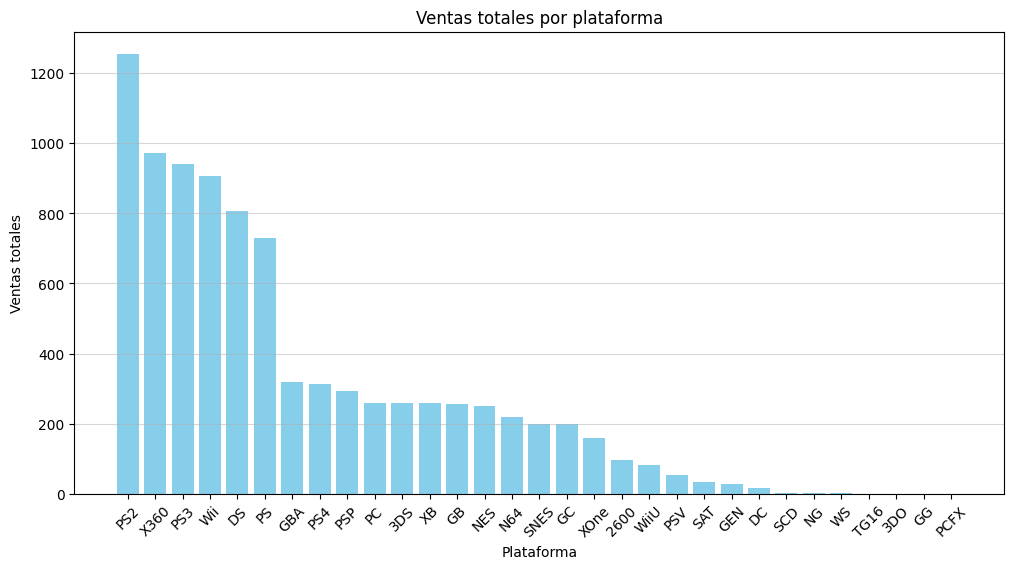

In [6]:
# Agrupa por plataforma y suma las ventas totales de cada una.
ventas_por_plataforma = df_games.groupby("platform", as_index=False)["total_sales"].sum()
# Ordena el df por ventas de mayor a menor.
ventas_por_plataforma = ventas_por_plataforma.sort_values("total_sales", ascending=False).reset_index(drop=True)
print(ventas_por_plataforma)

plt.figure(figsize=(12, 6))
plt.bar(ventas_por_plataforma["platform"], ventas_por_plataforma["total_sales"], color="skyblue")
plt.title("Ventas totales por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas totales")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.5)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos por plataforma



- Se muestran las ventas por plataforma ordenadas de mayor a menor.
- Se muestra un gráfico con la información visual de los resultados.
- Según la tabla y el gráfico, la consola que más juegos vendió fue la PS2, con una venta total de \$1,255.77
- Caso contrario, la consola que menos vendió fue la PCFX, con una venta total de \$0.03

In [7]:
# Crea una función que analiza un listado de plataformas y regresa de forma ordenada la información de cada plataforma con sus ventas,
# año en que inició y finalizó sus ventas y años activos en ventas.


def analiza_plataformas(plataformas):
    for n, plataforma in enumerate(plataformas):
        años_activo = sorted(df_games[df_games["platform"] == plataforma]["year_of_release"].unique())
        print(f"N° {n+1}: {plataforma}")
        venta_total = ventas_por_plataforma[ventas_por_plataforma["platform"] == plataforma]["total_sales"]
        print(f"Venta total: $ {venta_total.values[0]}")
        print(f"Inicio de ventas en el año: {años_activo[0]}")
        print(f"Último año de ventas registrado: {años_activo[-1]}")
        print(f"Años en ventas: {len(años_activo)}\n")

- Para esta función se tomará en cuenta como parámeto el listado de las 10 plataformas con más ventas y las 10 plataformas con menores ventas de videojuegos para su análisis.

##### **Plataformas con más ventas**

In [8]:
# Crea una lista con las 10 plataformas con más ventas.
plataformas_mayor_ventas = ventas_por_plataforma.head(10)["platform"].tolist()

# Filtra el DataFrame con las 10 plataformas con más ventas.
df_plataformas_mayor_ventas = df_games[df_games["platform"].isin(plataformas_mayor_ventas)]

# Crea una tabla dinámica con las ventas por año del top 10 plataformas con más ventas.
tabla_plataformas_mayor_ventas = df_plataformas_mayor_ventas.pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum", fill_value=0
)

print(tabla_plataformas_mayor_ventas)
print("\nPlataformas con más ventas de videojuegos:\n")
analiza_plataformas(plataformas_mayor_ventas)

platform             DS    GBA     PC      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1985               0.02   0.00   0.04    0.00    0.00    0.00    0.00   0.00   
1988               0.00   0.00   0.03    0.00    0.00    0.00    0.00   0.00   
1992               0.00   0.00   3.03    0.00    0.00    0.00    0.00   0.00   
1994               0.00   0.00  12.87    6.03    0.00    0.00    0.00   0.00   
1995               0.00   0.00   4.22   35.96    0.00    0.00    0.00   0.00   
1996               0.00   0.00  10.58   94.70    0.00    0.00    0.00   0.00   
1997               0.00   0.00  11.27  136.17    0.00    0.00    0.00   0.00   
1998               0.00   0.00   3.26  169.49    0.00    0.00    0.00   0.00   
1999               0.00   0.00   4.74  144.53    0.00    0.00    0.00   0.00   
2000               0.00   0.07   4.66   96.37   39.17    0.00    0.00   0.00   
2001               0.00  61.53   5.47   

- Se muestra una tabla con las ventas por año de las 10 plataformas líderes en venta de videojuegos.
- De estas plataformas se observa en los resultados que la más reciente fue la PS4, con ventas de videojuegos a partir del año 2013.
- De estas plataformas, la PC obtuvo la menor venta, con un total de $259.52, sin embargo, ha sido la plataforma que se mantenido por más tiempo, con un total de 26 años activos en el mercado de los videojuegos.

##### **Plataformas con menos ventas**

In [9]:
# Crea una lista con las 10 plataformas con menos ventas.
plataformas_menor_ventas = ventas_por_plataforma.tail(10)["platform"].tolist()
plataformas_menor_ventas.reverse()


# Filtra el DataFrame con las 10 plataformas con menos ventas.
df_plataformas_menor_ventas = df_games[df_games["platform"].isin(plataformas_menor_ventas)]


# Crea una tabla dinámica con las ventas por año del top 10 plataformas con menos ventas.
tabla_plataformas_menor_ventas = df_plataformas_menor_ventas.pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum", fill_value=0
)

print(tabla_plataformas_menor_ventas)
print("\nPlataformas con menos ventas de videojuegos:\n")
analiza_plataformas(plataformas_menor_ventas)

platform          3DO    DC    GEN    GG    NG  PCFX    SAT   SCD  TG16    WS
year_of_release                                                              
1990             0.00  0.00   2.60  0.00  0.00  0.00   0.00  0.00  0.00  0.00
1991             0.00  0.00   4.33  0.00  0.00  0.00   0.00  0.00  0.00  0.00
1992             0.00  0.00  12.64  0.04  0.00  0.00   0.00  0.00  0.00  0.00
1993             0.00  0.00   0.65  0.00  0.21  0.00   0.00  1.50  0.00  0.00
1994             0.02  0.00   8.13  0.00  0.80  0.00   3.65  0.36  0.00  0.00
1995             0.08  0.00   0.00  0.00  0.33  0.00  11.57  0.00  0.16  0.00
1996             0.00  0.00   0.00  0.00  0.10  0.03   7.69  0.00  0.00  0.00
1997             0.00  0.00   0.00  0.00  0.00  0.00   6.77  0.00  0.00  0.00
1998             0.00  3.38   0.00  0.00  0.00  0.00   3.82  0.00  0.00  0.00
1999             0.00  5.16   0.00  0.00  0.00  0.00   0.09  0.00  0.00  0.46
2000             0.00  5.99   0.00  0.00  0.00  0.00   0.00  0.0

- Se muestra una tabla con las ventas por año de las 10 plataformas con menos ventas de videojuegos.
- De estas plataformas se observa en los resultados que la más antigua fue la GEN, con ventas de videojuegos a partir del año 1990.
- De estas plataformas, la PCFX obtuvo la menor venta, con un total de $0.03, y con solo 1 año activo en el mercado de los videojuegos.

##### **Muestra los gráficos comparativos entre plataformas con mayores y menores ventas**

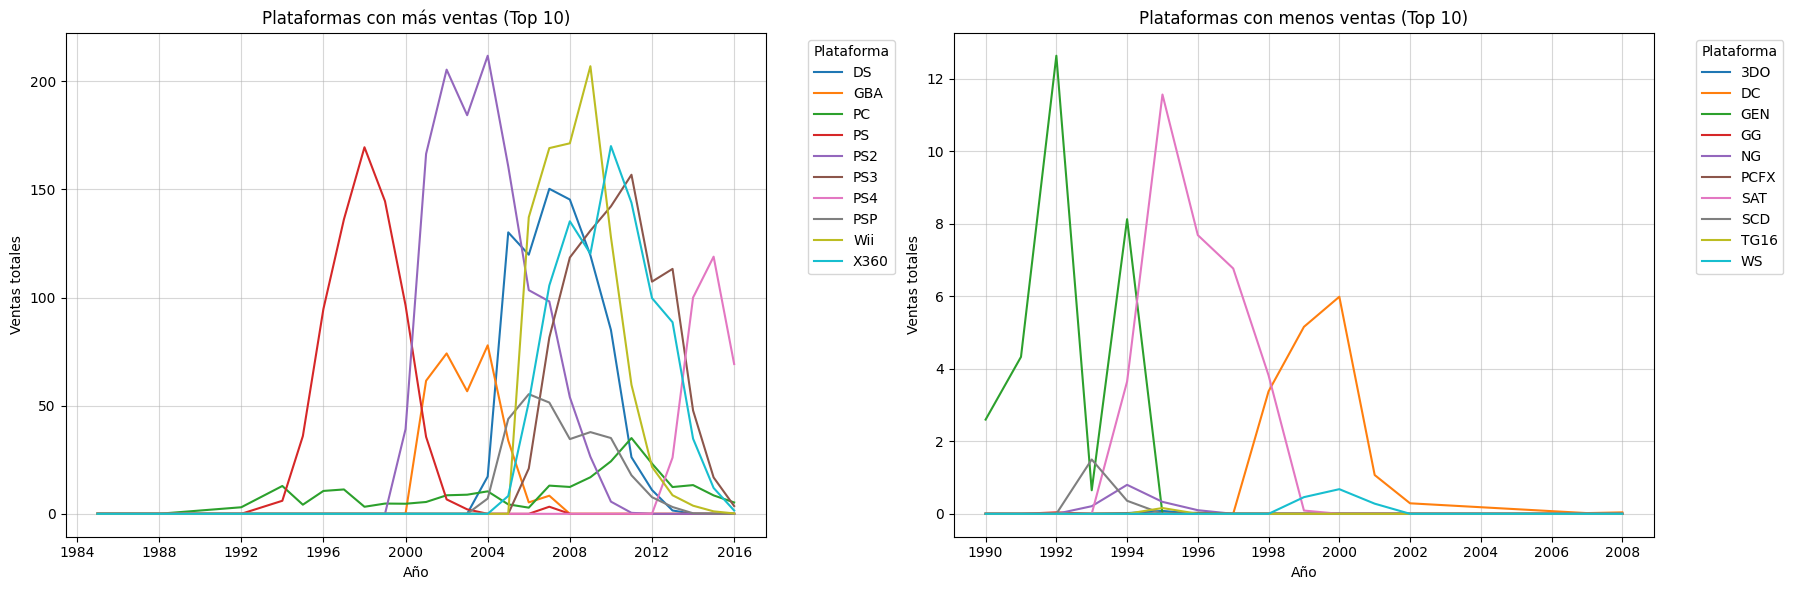

In [10]:
# Crea una figura con dos subgráficos (1 fila, 2 columnas).
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico para el Top 10.
tabla_plataformas_mayor_ventas.plot(ax=ax1)
ax1.set_title("Plataformas con más ventas (Top 10)")
ax1.set_xlabel("Año")
ax1.set_ylabel("Ventas totales")
ax1.grid(True, alpha=0.5)
ax1.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc="upper left")
ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))  # Ticks enteros

# Gráfico para el Bottom 10.
tabla_plataformas_menor_ventas.plot(ax=ax2)
ax2.set_title("Plataformas con menos ventas (Top 10)")
ax2.set_xlabel("Año")
ax2.set_ylabel("Ventas totales")
ax2.grid(True, alpha=0.5)
ax2.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc="upper left")
ax2.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))  # Ticks enteros

# Ajusta el diseño para que no se empalmen las leyendas.
plt.tight_layout()
plt.show()

##### **Evalúa la relación entre las reseñas de los usuarios y profesionales con las ventas**

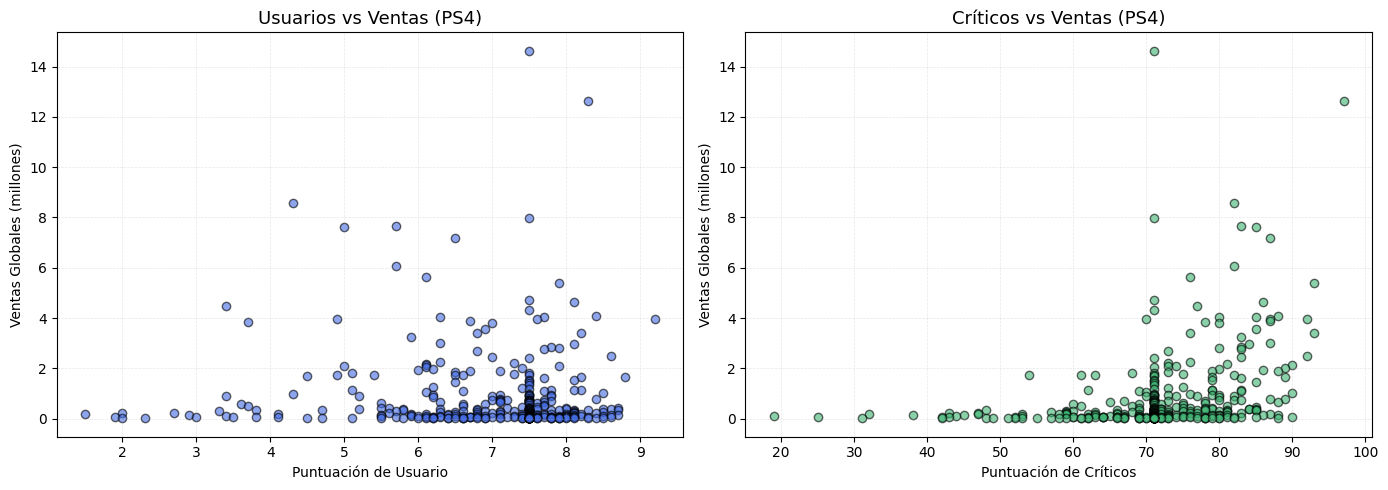

In [11]:
# Crea un DataFrame para la plataforma de PS4.
df_ps4 = df_games[df_games["platform"] == "PS4"]
# Conserva solamente estas columnas:
df_ps4 = df_ps4[["user_score", "critic_score", "total_sales"]]

plt.figure(figsize=(14, 5))

# Gráfico 1: User Score.
plt.subplot(1, 2, 1)
plt.scatter(df_ps4["user_score"], df_ps4["total_sales"], alpha=0.6, color="royalblue", edgecolor="black")
plt.title("Usuarios vs Ventas (PS4)", fontsize=13)
plt.xlabel("Puntuación de Usuario")
plt.ylabel("Ventas Globales (millones)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)

# Gráfico 2: Critic Score.
plt.subplot(1, 2, 2)
plt.scatter(df_ps4["critic_score"], df_ps4["total_sales"], alpha=0.6, color="mediumseagreen", edgecolor="black")
plt.title("Críticos vs Ventas (PS4)", fontsize=13)
plt.xlabel("Puntuación de Críticos")
plt.ylabel("Ventas Globales (millones)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

##### **Comparación gráfica (de caja) de ventas entre las plataformas líderas en ventas**

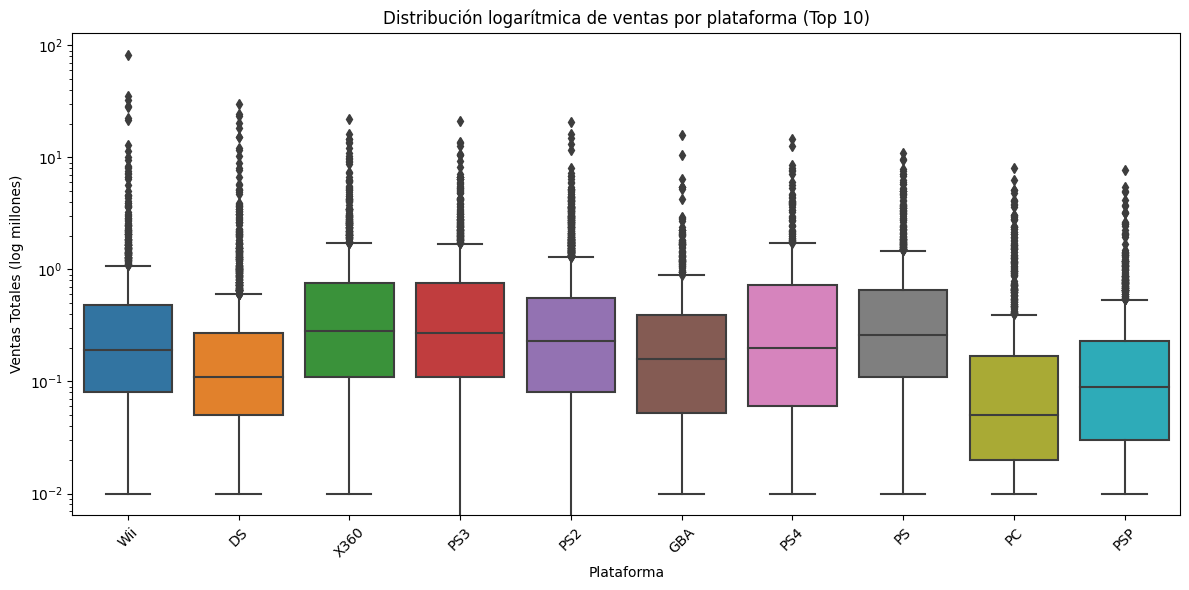

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plataformas_mayor_ventas, x='platform', y='total_sales')

plt.yscale('log') # Escala logarítmica.
plt.title('Distribución logarítmica de ventas por plataforma (Top 10)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (log millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Los rangos intercuartílicos (IQR) son similares entre plataformas. Esto apunta a que el 50% de sus ventas se concentra en un rango parecido.
* Se puede observar que en cada plataforma hay valores atípicos, los cuales representan juegos que vendieron mucho más que el promedio.
* Debido a estas ventas atípicas de ciertos juegos, se usó una escala logarítmica, que permite comprender mejor el mercado de los videojuegos.

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Aldo, solamente para terminar de complementar el análisis te recomiendo realizar un gráfco de cajas que nos ayude a comparar las ventas entre plataformas y a identificar registros atípicos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Usuarios vs Ventas:

- Hay una concentración de juegos con puntuaciones entre 6 y 8.
- La mayoría de las ventas son bajas (menos de 1 millón).
- No se observa una relación clara entre mayor puntuación de usuario y mayores ventas.
- Algunos juegos con ventas altas tienen puntuaciones moderadas (6–8), no necesariamente las más altas.

Críticos vs Ventas:

- Se nota una ligera tendencia positiva. Conforme mayor es la puntuación de los críticos mayores son también las ventas.
- Las puntuaciones de los críticos es más dispersa.
- Hay una correlación más evidente que en el gráfico de los usuarios.

Según el gráfico obtenido, la reseña de los críticos parecen tener más influencia en las ventas que las reseñas de los usuarios.

##### **Muestra la correlación entre las reseñas y las ventas.**

In [13]:
df_ps4.select_dtypes(include='number').corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.507069,-0.062756
critic_score,0.507069,1.000000,0.338706
total_sales,-0.062756,0.338706,1.000000


- user_score vs total_sales. Correlación -0.06:
  Correlación muy baja negativa. Esto indica que las reseñas de usuarios no tienen una relación significativa con las ventas.

- critic_score vs total_sales. Correlación +0.33:
  Correlación positiva moderada. Sugiere que mejores reseñas de críticos tienden a asociarse con mayores ventas, aunque no es fuerte.

- user_score vs critic_score. Correlación: +0.51:
  Correlación moderada entre usuarios y críticos. Indica que cuando los críticos califican alto, los usuarios también.

##### **Ventas por género**

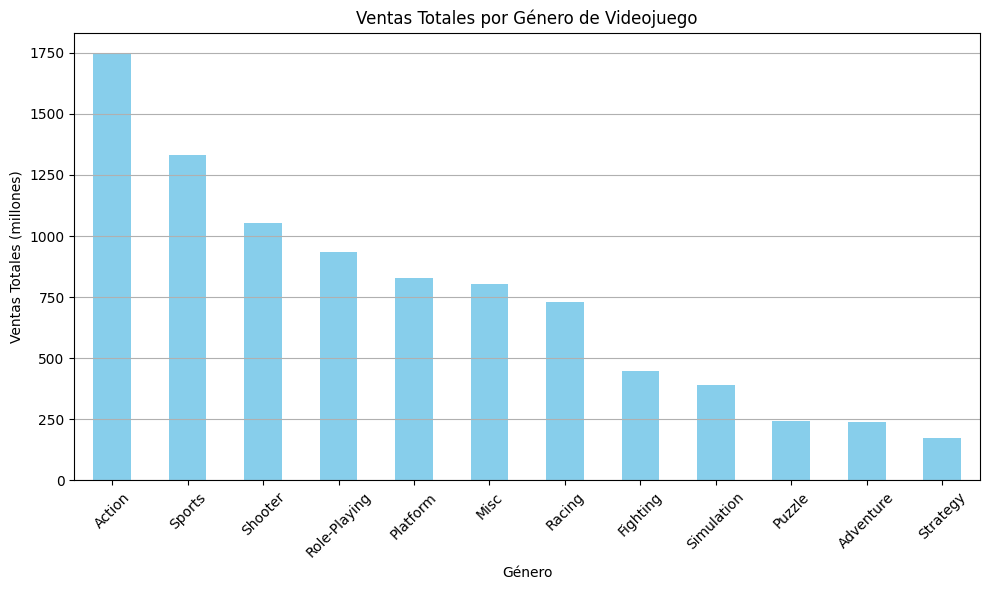

In [14]:
# Agrupa por género y suma las ventas.
ventas_por_genero = df_games.groupby("genre")["total_sales"].sum().sort_values(ascending=False)

# Visualiza los resultados.
ventas_por_genero.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Ventas Totales por Género de Videojuego")
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

- Los juegos de acción son el género con mayor ventas. Cuentan con franquicias consolidadas como GTA.
- Los juegos de estrategia, por el contrario, son el género con menor ventas de videojuegos.

#### **Paso 4. Crea un perfil de usuario para cada región.**

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

##### **Top 5 Plataformas por región**

In [15]:
# Agrupa ventas por plataforma de cada región.
ventas_plataforma_region = df_games.groupby("platform")[["na_sales", "eu_sales", "jp_sales"]].sum()

# Venta de plataformas en Norteamérica.
ventas_plataforma_na = ventas_plataforma_region["na_sales"].sum()
# Venta de plataformas en Europa.
ventas_plataforma_eu = ventas_plataforma_region["eu_sales"].sum()
# Venta de plataformas en Japón.
ventas_plataforma_jp = ventas_plataforma_region["jp_sales"].sum()

# Agrega las cuotas de mercado para Norteamérica.
ventas_plataforma_region["na_cuota_mercado"] = ventas_plataforma_region["na_sales"] / ventas_plataforma_na * 100
# Agrega las cuotas de mercado para Europa.
ventas_plataforma_region["eu_cuota_mercado"] = ventas_plataforma_region["eu_sales"] / ventas_plataforma_eu * 100
# Agrega las cuotas de mercado para Japón.
ventas_plataforma_region["jp_cuota_mercado"] = ventas_plataforma_region["jp_sales"] / ventas_plataforma_jp * 100

# Top 5 plataformas Norteamérica.
top5_plataformas_na = ventas_plataforma_region.sort_values("na_sales", ascending=False).head(5)
# Top 5 plataformas Europa.
top5_plataformas_eu = ventas_plataforma_region.sort_values("eu_sales", ascending=False).head(5)
# Top 5 plataformas Japón.
top5_plataformas_jp = ventas_plataforma_region.sort_values("jp_sales", ascending=False).head(5)

print(top5_plataformas_na[["na_sales", "na_cuota_mercado"]])
print(top5_plataformas_eu[["eu_sales", "eu_cuota_mercado"]])
print(top5_plataformas_na[["jp_sales", "jp_cuota_mercado"]])

          na_sales  na_cuota_mercado
platform                            
X360        602.47         13.690726
PS2         583.84         13.267372
Wii         496.90         11.291719
PS3         393.49          8.941796
DS          382.40          8.689783
          eu_sales  eu_cuota_mercado
platform                            
PS2         339.29         13.996304
PS3         330.29         13.625038
X360        270.76         11.169322
Wii         262.21         10.816620
PS          213.61          8.811785
          jp_sales  jp_cuota_mercado
platform                            
X360         12.43          0.958114
PS2         139.20         10.729647
Wii          69.33          5.344012
PS3          80.19          6.181109
DS          175.57         13.533075


##### **Muestra el gráfico**


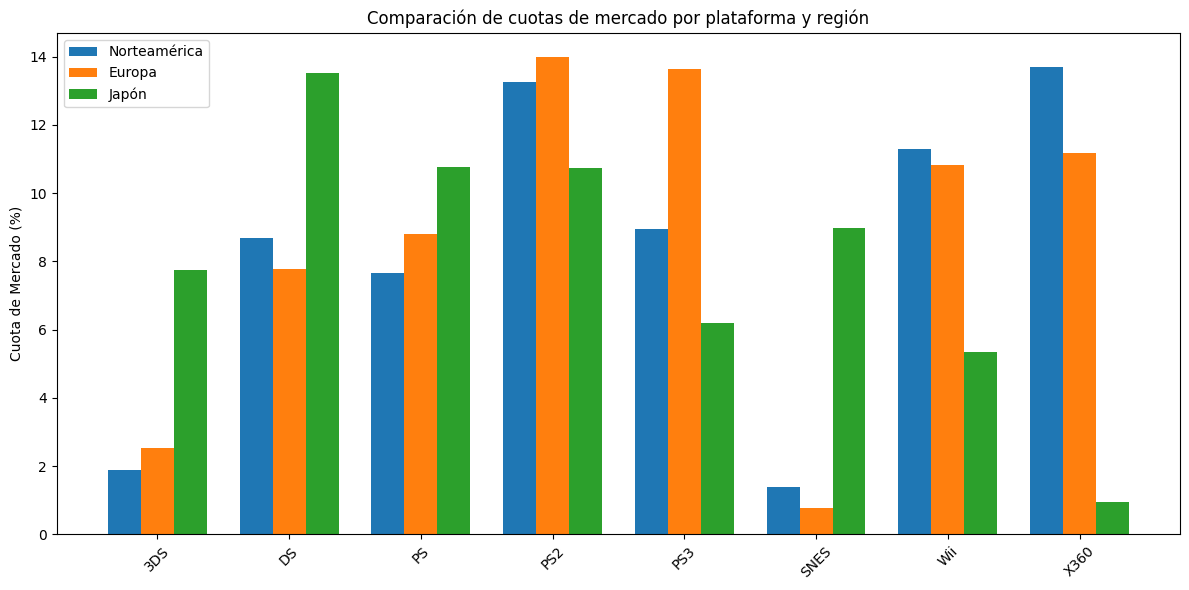

In [16]:
# Unie las plataformas top de las 3 regiones (para no perder ninguna).
top_platformas = pd.Index(top5_plataformas_na.index).union(top5_plataformas_eu.index).union(top5_plataformas_jp.index)

# Filtra datos solo para esas plataformas.
comparacion = ventas_plataforma_region.loc[top_platformas, ["na_cuota_mercado", "eu_cuota_mercado", "jp_cuota_mercado"]]

# Reemplaza NaN por 0 para evitar problemas al graficar (si alguna plataforma no está en una región).
comparacion = comparacion.fillna(0)

# Crea un gráfico de barras.
fig, ax = plt.subplots(figsize=(12, 6))

# Posiciones y ancho de barra.
x = range(len(comparacion))
width = 0.25

# Barras para cada región.
ax.bar([p - width for p in x], comparacion["na_cuota_mercado"], width=width, label="Norteamérica")
ax.bar(x, comparacion["eu_cuota_mercado"], width=width, label="Europa")
ax.bar([p + width for p in x], comparacion["jp_cuota_mercado"], width=width, label="Japón")

# Etiquetas y título.
ax.set_xticks(x)
ax.set_xticklabels(comparacion.index, rotation=45)
ax.set_ylabel("Cuota de Mercado (%)")
ax.set_title("Comparación de cuotas de mercado por plataforma y región")
ax.legend()

plt.tight_layout()
plt.show()

- Xbox es la plataforma dominante con la mayor cuota de mercado.
- Existe una competencia visible entre Microsoft (Xbox) y Sony (PS).
- Xbox tiene presencia en Norteamérica y Europa, pero no en Japón.
- Sony tiene presencia en todas las regiones, especialmente en Europa y Japón.
- Japón favorece las marcas locales, mientras que en Norteamérica es más equilibrada en las grandes marcas.


##### **Top 5 géneros por región**

In [17]:
# Agrupa por género y suma las ventas en cada región.
ventas_genero_region = df_games.groupby("genre")[["na_sales", "eu_sales", "jp_sales"]].sum()

# Top 5 géneros en Norteamérica.
top5_generos_na = ventas_genero_region["na_sales"].sort_values(ascending=False).head(5)
# Top 5 géneros en Europa.
top5_generos_eu = ventas_genero_region["eu_sales"].sort_values(ascending=False).head(5)
# Top 5 géneros en Japón.
top5_generos_jp = ventas_genero_region["jp_sales"].sort_values(ascending=False).head(5)

print(top5_generos_na)
print(top5_generos_eu)
print(top5_generos_jp)

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


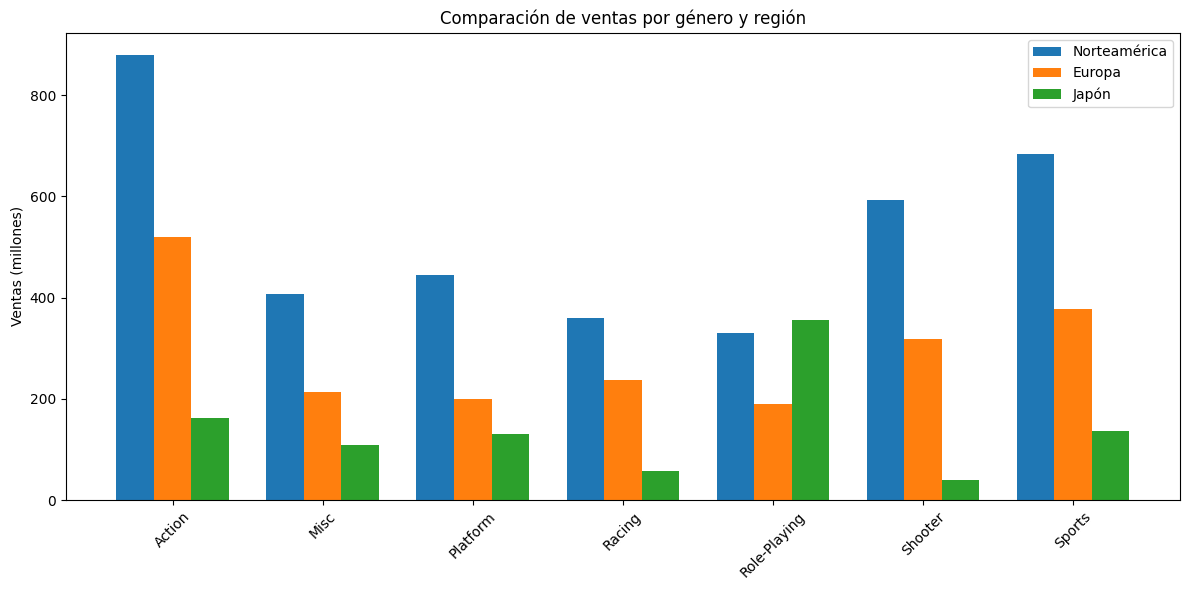

In [18]:
# Une todos los géneros top para compararlos en un solo gráfico
top_generos = pd.Index(top5_generos_na.index).union(top5_generos_eu.index).union(top5_generos_jp.index)
comparacion_generos = ventas_genero_region.loc[top_generos, ["na_sales", "eu_sales", "jp_sales"]]

# Crea el gráfico
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(comparacion_generos))
width = 0.25

ax.bar([p - width for p in x], comparacion_generos["na_sales"], width=width, label="Norteamérica")
ax.bar(x, comparacion_generos["eu_sales"], width=width, label="Europa")
ax.bar([p + width for p in x], comparacion_generos["jp_sales"], width=width, label="Japón")

ax.set_xticks(x)
ax.set_xticklabels(comparacion_generos.index, rotation=45)
ax.set_ylabel("Ventas (millones)")
ax.set_title("Comparación de ventas por género y región")
ax.legend()
plt.tight_layout()
plt.show()

- El género de acción es el dominante en Norteamérica y Europa, pero tiene más peso en Norteamérica.
- Para Japón, los juegos de Role-Playing son los más vendidos, lo que convierte a esta región lider en este género.

         na_sales  eu_sales  jp_sales
rating                               
AO           1.26      0.61      0.00
E         1292.99    710.25    198.11
E10+       353.32    188.52     40.20
EC           1.53      0.11      0.00
K-A          2.56      0.27      1.46
M          748.48    483.97     64.24
RP           0.00      0.08      0.00
T          759.75    427.03    151.40
Unknown   1240.68    613.30    841.93


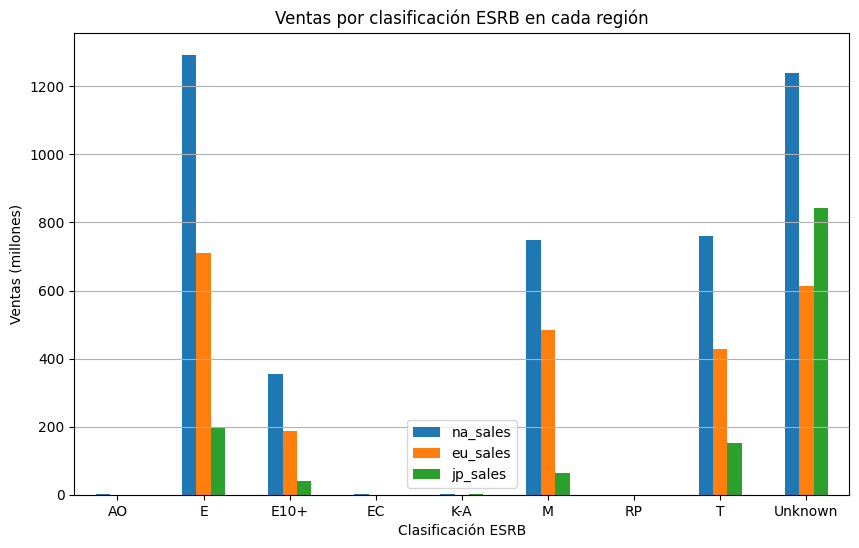

In [19]:
ventas_rating_region = df_games.groupby("rating")[["na_sales", "eu_sales", "jp_sales"]].sum()
print(ventas_rating_region)
ventas_rating_region.plot(kind="bar", figsize=(10, 6))
plt.title("Ventas por clasificación ESRB en cada región")
plt.ylabel("Ventas (millones)")
plt.xlabel("Clasificación ESRB")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

- La clasificación "E" domina las ventas. Esto sugiere que los juegos de esta clasificación, al ser aptos para todas las edades, tienen un mercado más amplio.
- Las clasificaciones "M" y "T" también tienen ventas significativas. Esto indica la presencia de un gran público de adolescentes y adultos, pero no superan la clasificación "E".
- La clasificación "Unknown" también tiene ventas muy altas. En Japón son la clasificación más vendida. Podría deberse a un sistema de clasificación diferente.


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

#### **Paso 5. Prueba las siguientes hipótesis:**

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
- Establece tu mismo el valor de umbral alfa.

Explica:

- Cómo formulaste las hipótesis nula y alternativa.
- Qué criterio utilizaste para probar las hipótesis y por qué.

##### **Hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

In [25]:
# Definir alfa.
alpha = 0.05

# Hipótesis 1: Xbox One vs PC.
xone_score = df_games[df_games["platform"] == "XOne"]["user_score"]
pc_score = df_games[df_games["platform"] == "PC"]["user_score"]

# Prueba de Levene para varianzas.
stat_levene_1, p_levene_1 = levene(xone_score, pc_score)
print(f"Levene test Xbox One vs PC: stat={stat_levene_1:.4f}, p={p_levene_1:.4f}")

# Decidir valor de equal_var.
equal_var_1 = p_levene_1 > alpha

# Prueba t con equal_var según Levene.
stat_t_1, p_t_1 = ttest_ind(xone_score, pc_score, equal_var=equal_var_1)
print(f"T-test Xbox One vs PC: stat={stat_t_1:.4f}, p={p_t_1:.4f}")

if p_t_1 < alpha:
    print("Rechazamos H0: Las medias son diferentes.")
else:
    print("No rechazamos H0: No hay diferencia significativa en las medias.")

Levene test Xbox One vs PC: stat=0.0001, p=0.9930
T-test Xbox One vs PC: stat=-3.9005, p=0.0001
Rechazamos H0: Las medias son diferentes.


* Prueba de Levene (igualdad de varianzas):
    * El p-value obtenido fue 0.9930, mayor que el nivel de significancia α=0.05\alpha = 0.05α=0.05, por lo que no se rechaza la hipótesis nula.
    * Esto indica que las varianzas pueden considerarse iguales, y por lo tanto, se justifica usar equal_var=True en la prueba t de Student.
* Prueba t de Student para muestras independientes:
    * El p-value fue 0.0001, menor que α=0.05\alpha = 0.05α=0.05, por lo tanto, se rechaza la hipótesis nula.
    * Hay evidencia estadística suficiente para afirmar que las calificaciones promedio de usuarios entre Xbox One y PC son diferentes.

Justificación del método:
Se utilizó la prueba t de Student para muestras independientes con varianzas iguales (equal_var=True), ya que así lo indicó la prueba de Levene.


##### **Hipótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**


In [27]:
# Hipótesis 2: Action vs Sports.
action_genre_score = df_games[df_games["genre"] == "Action"]["user_score"]
sports_genre_score = df_games[df_games["genre"] == "Sports"]["user_score"]

# Prueba de Levene para varianzas.
stat_levene_2, p_levene_2 = levene(action_genre_score, sports_genre_score)
print(f"\nLevene test Action vs Sports: stat={stat_levene_2:.4f}, p={p_levene_2:.4f}")

# Decidir valor de equal_var.
equal_var_2 = p_levene_2 > alpha

# Prueba t con equal_var según Levene.
stat_t_2, p_t_2 = ttest_ind(action_genre_score, sports_genre_score, equal_var=equal_var_2)
print(f"T-test Action vs Sports: stat={stat_t_2:.4f}, p={p_t_2:.4f}")

if p_t_2 < alpha:
    print("Rechazamos H0: Las medias son diferentes.")
else:
    print("No rechazamos H0: No hay diferencia significativa en las medias.")


Levene test Action vs Sports: stat=0.1670, p=0.6828
T-test Action vs Sports: stat=0.3677, p=0.7131
No rechazamos H0: No hay diferencia significativa en las medias.


* Prueba de Levene (igualdad de varianzas):
    * El p-value obtenido fue 0.6828, mayor que el nivel de significancia 𝛼 = 0.05, por lo que no se rechaza la hipótesis nula.
    * Esto indica que las varianzas pueden considerarse iguales, y por lo tanto, se justifica usar equal_var=True en la prueba t de Student.
* Prueba t de Student para muestras independientes:
    * El p-value fue 0.7131, mayor que 𝛼 = 0.05, por lo tanto, no se rechaza la hipótesis nula.
    * No hay evidencia estadística suficiente para afirmar que las calificaciones promedio de usuarios entre los géneros Acción y Deportes sean diferentes.

Justificación del método: Se utilizó la prueba t de Student para muestras independientes con varianzas iguales (equal_var=True), ya que así lo indicó la prueba de Levene.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xone_score, pc_score)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### **Conclusión**

Durante este análisis se hizo una exploración, transformación y análisis de datos relacionados con videojuegos, con el objetivo de obtener conclusiones útiles sobre ventas y calificaciones de los usuarios.

Durante el proyecto se realizó:

- Exploración:

  - Se analizaron las columnas y los datos del DataFrame df_games.
  - Se limpiaron y prepararon los datos, eliminando o filtrando valores faltantes o inválidos en las columnas.

- Análisis gráficos:

  - Por medio de gráficos se observaron cuáles eran las plataformas más populares.
  - Las 10 plataformas con más ventas y las 10 plataformas con menos ventas.
  - La relación de la puntuación de los usuarios con las críticas de los profesionales sobre las ventas.
  - Las ventas obtenidas de cada género de plataformas.
  - Las cuotas de mercada para cada región (Norteamérica, Europa y Asia)
  - Ventas por género para cada región.
  - Ventas por clasificación ESRB.

- Análisis estadíscitos:

  - Se calcularon estadísticas como medias de calificaciones y ventas totales por género y plataforma.
  - Se usaron visualizaciones y agrupamientos (groupby) para identificar tendencias.

- Pruebas de hipótesis:

  - Comparación entre plataformas.
  - Comparación entre géneros.
  - Se realizaron pruebas t de Student para muestras independientes.

Como resultado, a través del código empleado, gráficos y pruebas estadísticas fue posible comprender mejor el comportamiento del mercado de videojuegos en términos de ventas, plataformas y géneros.
